In [229]:
import pandas as pd
from sklearn.datasets import load_iris

In [230]:
iris = load_iris()

In [231]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [232]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)

In [233]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [234]:
df.shape

(150, 4)

In [235]:
df['flower_name'] = iris.target

In [236]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_name
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [238]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
flower_name          0
dtype: int64

In [239]:
import matplotlib.pyplot as plt
%matplotlib inline

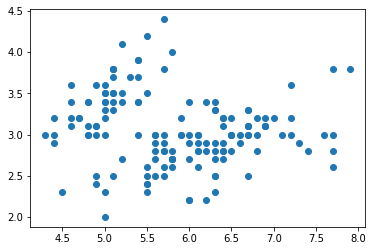

In [240]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])

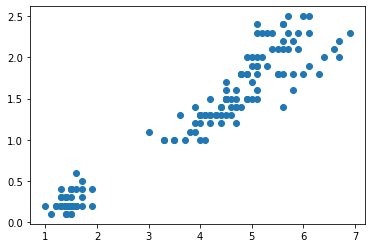

In [241]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

In [242]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [243]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_name
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [244]:
X = df.drop('flower_name', axis='columns')
y = df.flower_name

In [245]:
from sklearn.cluster import KMeans

In [246]:
sse = []
k_range = range(1,11)
for i in k_range:
    km = KMeans(n_clusters=i).fit(X)
    sse.append(km.inertia_)

C:\Users\Agni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'sse')

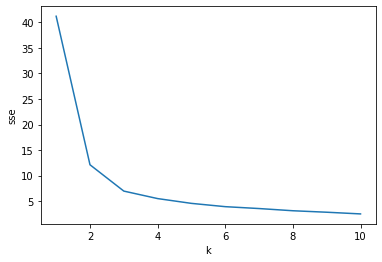

In [247]:
plt.plot(k_range,sse)
plt.xlabel("k")
plt.ylabel("sse")

In [248]:
km = KMeans(n_clusters=3, random_state=21)
y_pred = km.fit_predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [249]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_pca = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2'])

In [250]:
X_pca.head()

,PC1,PC2
0,-0.630703,0.107578
1,-0.622905,-0.104260
2,-0.669520,-0.051417
3,-0.654153,-0.102885
4,-0.648788,0.133488


In [251]:
X_pca['cluster'] = y_pred
X_pca.head(5)

,PC1,PC2,cluster
0,-0.630703,0.107578,1
1,-0.622905,-0.104260,1
2,-0.669520,-0.051417,1
3,-0.654153,-0.102885,1
4,-0.648788,0.133488,1


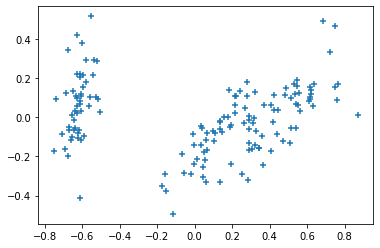

In [252]:
plt.scatter(X_pca.PC1, X_pca.PC2, marker='+')

In [253]:
km.cluster_centers_

array([[0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

In [254]:
reduced_centers = pca.fit_transform(km.cluster_centers_)

In [255]:
reduced_centers

array([[-0.12212923,  0.13885346],
       [ 0.64851505, -0.04777631],
       [-0.52638582, -0.09107715]])

In [256]:
x_pca1 = X_pca[X_pca['cluster']==0]
x_pca2 = X_pca[X_pca['cluster']==1]
x_pca3 = X_pca[X_pca['cluster']==2]

<function matplotlib.pyplot.show(close=None, block=None)>

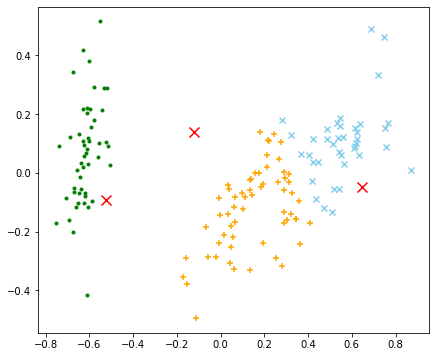

In [257]:
plt.figure(figsize=(7,6))

# plotting df features
plt.scatter(x_pca1.PC1,x_pca1.PC2,color='orange', marker='+')
plt.scatter(x_pca2.PC1,x_pca2.PC2,color='green', marker='.')
plt.scatter(x_pca3.PC1,x_pca3.PC2,color='skyblue', marker='x')



#plotting clusters centers
plt.scatter(reduced_centers[:,0], reduced_centers[:,1], color='red', marker='x',s=100)
plt.show